In [34]:
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np
warnings.filterwarnings('ignore')
np.random.seed(42)

# Yearly Pattern Visualization

Error processing AEP: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing COMED: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing DAYTON: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing DEOK: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing DOM: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing DUQ: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing EKPC: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing FE: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing PJME: module 'matplotlib.pyplot' has no attribute 'MonthLocator'
Error processing PJMW: module 'matplotlib.pyplot' has no attribute 'MonthLocator'


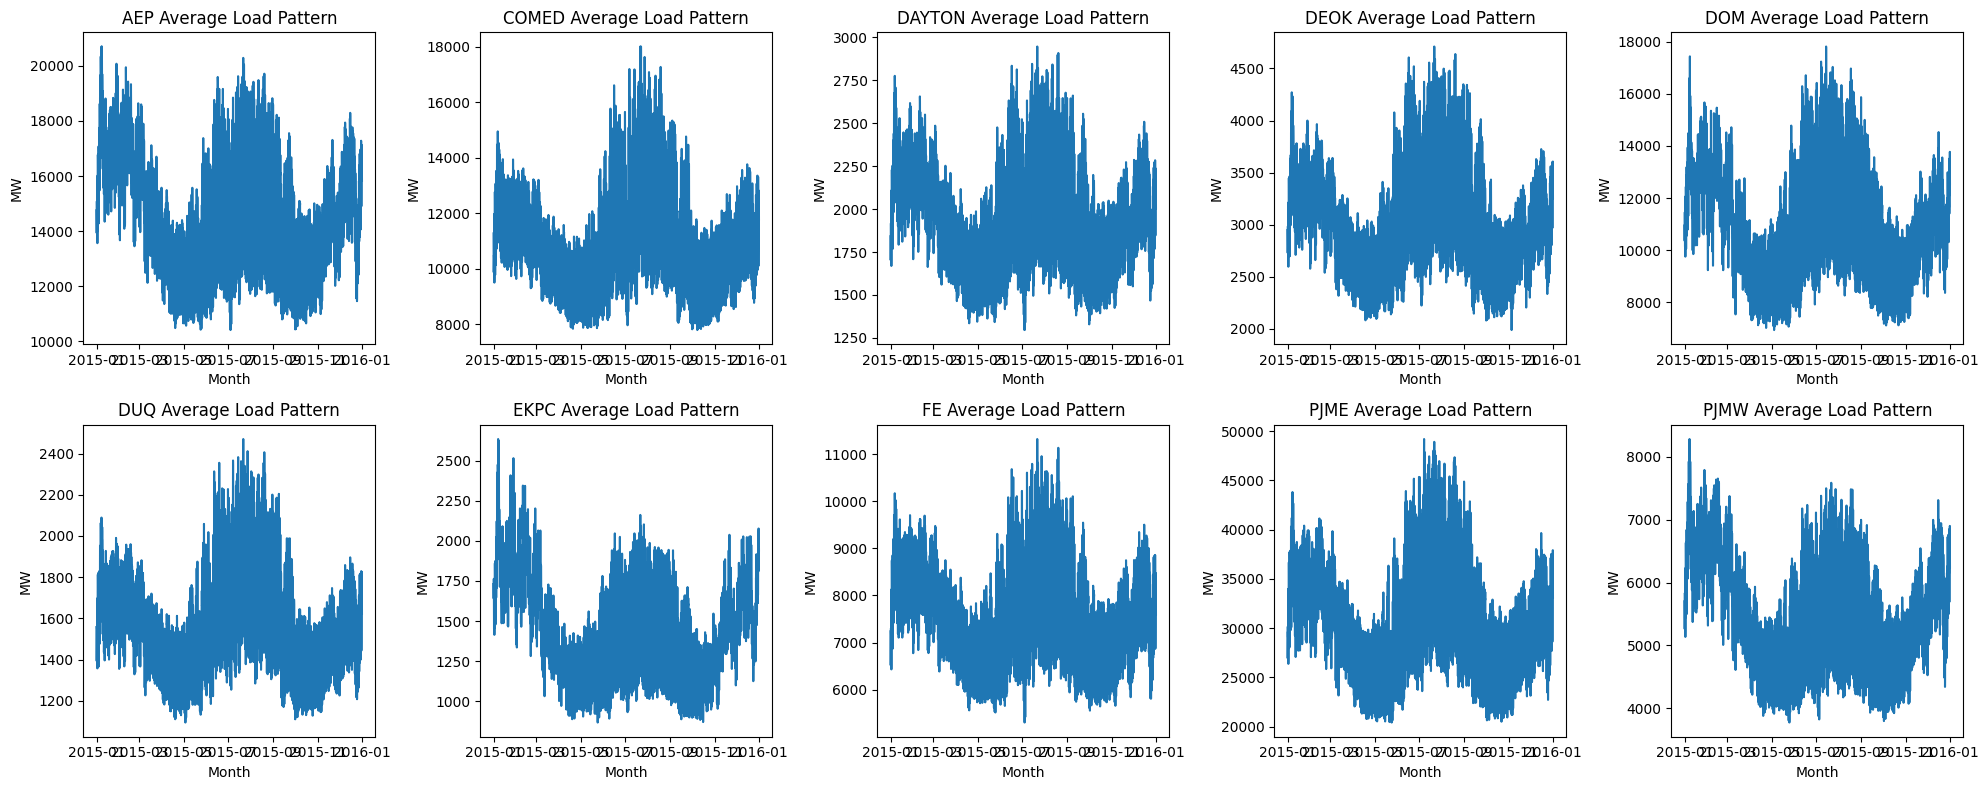

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

def create_utility_annual_pattern(utility_file, utility_name):
    # Read data
    df = pd.read_csv(utility_file)
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed')
    mw_col = f'{utility_name}_MW'
    
    # Filter to 2014-2017 and exclude Feb 29
    mask = (df['Datetime'].dt.year.isin([2014, 2015, 2016, 2017]) & 
           ~((df['Datetime'].dt.month == 2) & (df['Datetime'].dt.day == 29)))
    data = df[mask].copy()
    
    # Group by month, day, hour and average
    data['month'] = data['Datetime'].dt.month
    data['day'] = data['Datetime'].dt.day
    data['hour'] = data['Datetime'].dt.hour
    
    # Calculate average for each month-day-hour combination
    avg_data = data.groupby(['month', 'day', 'hour'])[mw_col].mean().reset_index()
    
    # Create reference dates using 2015 (non-leap year)
    avg_data['date'] = pd.to_datetime(
        {
            'year': 2015,  # Using 2015 as reference (non-leap year)
            'month': avg_data['month'],
            'day': avg_data['day'],
            'hour': avg_data['hour']
        }
    )
    
    avg_data = avg_data.sort_values('date')
    return avg_data['date'], avg_data[mw_col]

# Set up the plots
utilities = {
    'AEP': 'AEP_hourly.csv',
    'COMED': 'COMED_hourly.csv',
    'DAYTON': 'DAYTON_hourly.csv', 
    'DEOK': 'DEOK_hourly.csv',
    'DOM': 'DOM_hourly.csv',
    'DUQ': 'DUQ_hourly.csv',
    'EKPC': 'EKPC_hourly.csv',
    'FE': 'FE_hourly.csv',
    'PJME': 'PJME_hourly.csv',
    'PJMW': 'PJMW_hourly.csv'
}

# Create subplot grid
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, (utility, filename) in enumerate(utilities.items()):
    try:
        dates, values = create_utility_annual_pattern(filename, utility)
        axes[idx].plot(dates, values)
        axes[idx].set_title(f'{utility} Average Load Pattern')
        axes[idx].set_xlabel('Month')
        axes[idx].set_ylabel('MW')
        
        # Format x-axis to show months
        axes[idx].xaxis.set_major_locator(plt.MonthLocator())
        axes[idx].xaxis.set_major_formatter(plt.DateFormatter('%b'))
        
        # Rotate x-axis labels for better readability
        plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)
        
    except Exception as e:
        print(f"Error processing {utility}: {str(e)}")

plt.tight_layout()
plt.show()

# Merge datasets

In [36]:
def create_combined_dataset():
    utilities = {
        'AEP': 'AEP_hourly.csv',
        'COMED': 'COMED_hourly.csv',  
        'DAYTON': 'DAYTON_hourly.csv',
        'DEOK': 'DEOK_hourly.csv',
        'DOM': 'DOM_hourly.csv', 
        'DUQ': 'DUQ_hourly.csv',
        'EKPC': 'EKPC_hourly.csv',
        'FE': 'FE_hourly.csv',
        'PJME': 'PJME_hourly.csv',
        'PJMW': 'PJMW_hourly.csv'
    }
    
    start_date = '2013-12-31 01:00:00'
    end_date = '2018-01-02 00:00:00'
    
    # Start with first utility to get the base DataFrame
    df_base = pd.read_csv('AEP_hourly.csv')
    df_base['Datetime'] = pd.to_datetime(df_base['Datetime'], format='mixed')
    
    # Initialize result DataFrame
    result = pd.DataFrame({'Datetime': df_base['Datetime']})
    
    # Process each utility and merge
    for util, file in utilities.items():
        # Read data
        df = pd.read_csv(file)
        df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed')
        
        # Calculate mean for normalization using ALL data
        mw_col = f'{util}_MW'
        mean_value = df[mw_col].mean()
        
        # Create normalized values
        df[util] = df[mw_col] / mean_value
        
        # Then filter to desired date range
        mask = (df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)
        df = df[mask].copy()
        
        # Keep only Datetime and normalized column
        df = df[['Datetime', util]]
        
        # Merge with result
        result = result.merge(df, on='Datetime', how='inner')
    
    # Calculate MW_pattern
    result['MW_pattern'] = result[utilities.keys()].mean(axis=1)
    
    # Sort by datetime
    result = result.sort_values('Datetime')
    
    return result

# Create and save the dataset
  

In [37]:
dataset = pd.read_csv('combined_utility_data_with_MW_pattern.csv')

In [38]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49421 entries, 0 to 49420
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Datetime    49421 non-null  object 
 1   AEP         49421 non-null  float64
 2   COMED       49421 non-null  float64
 3   DAYTON      49421 non-null  float64
 4   DEOK        49421 non-null  float64
 5   DOM         49421 non-null  float64
 6   DUQ         49421 non-null  float64
 7   EKPC        49421 non-null  float64
 8   FE          49421 non-null  float64
 9   PJME        49421 non-null  float64
 10  PJMW        49421 non-null  float64
 11  MW_pattern  49421 non-null  float64
dtypes: float64(11), object(1)
memory usage: 4.5+ MB
None


# Extract Hourly Patterns

In [39]:
def extract_hourly_pattern(df):
    # Convert Datetime to datetime type if it isn't already
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Extract hour from datetime
    df['hour'] = df['Datetime'].dt.hour
    
    # Calculate the mean MW_pattern value for each hour
    hourly_averages = df.groupby('hour')['MW_pattern'].mean()
    
    # Convert to dictionary for easier lookup
    hourly_multipliers = hourly_averages.to_dict()
    
    # Validate that multipliers average to approximately 1.0
    avg = sum(hourly_multipliers.values()) / 24
    assert 0.97 <= avg <= 1.03, f"Hourly multipliers should average to 1.0, got {avg}"
    
    return hourly_multipliers

# Extract Daily Patterns

In [40]:
def extract_daily_pattern(df):
    # Convert Datetime to datetime type if it isn't already
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Extract day of week (0=Monday, 6=Sunday)
    df['day_of_week'] = df['Datetime'].dt.dayofweek
    
    # Calculate the mean MW_pattern value for each day of week
    daily_averages = df.groupby('day_of_week')['MW_pattern'].mean()
    
    # Convert to dictionary for easier lookup
    daily_multipliers = daily_averages.to_dict()
    
    # Validate that multipliers average to approximately 1.0
    avg = sum(daily_multipliers.values()) / 7
    assert 0.97 <= avg <= 1.03, f"Daily multipliers should average to 1.0, got {avg}"
    
    return daily_multipliers

# Extract Monthly Patterns

In [41]:
def extract_monthly_pattern(df):
    # Convert Datetime to datetime type if it isn't already
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Extract month from datetime
    df['month'] = df['Datetime'].dt.month
    
    # Calculate the mean MW_pattern value for each month
    monthly_averages = df.groupby('month')['MW_pattern'].mean()
    
    # Convert to dictionary for easier lookup
    monthly_multipliers = monthly_averages.to_dict()
    
    # Validate that multipliers average to approximately 1.0
    avg = sum(monthly_multipliers.values()) / 12
    assert 0.97 <= avg <= 1.03, f"Monthly multipliers should average to 1.0, got {avg}"
    
    return monthly_multipliers

# Extract Yearly Patterns

In [42]:
def extract_yearly_growth(df):
    # Convert Datetime to datetime type if it isn't already
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    
    # Extract year and calculate yearly averages
    df['year'] = df['Datetime'].dt.year
    yearly_averages = df.groupby('year')['MW_pattern'].mean()
    
    # Calculate year-over-year growth rates
    yoy_growth_rates = yearly_averages.pct_change()
    
    # Calculate average growth rate
    # Using geometric mean since we're dealing with growth rates
    # Adding 1 to rates before geometric mean and subtracting 1 after to handle possible negative growth rates correctly
    growth_rates_plus_one = yoy_growth_rates + 1
    avg_growth_rate = np.power(np.prod(growth_rates_plus_one.dropna()), 
                              1/len(growth_rates_plus_one.dropna())) - 1
    
    return avg_growth_rate

In [43]:
hourly_multipliers = extract_hourly_pattern(dataset)
daily_multipliers = extract_daily_pattern(dataset)
monthly_multipliers = extract_monthly_pattern(dataset)
yearly_growth_rate = extract_yearly_growth(dataset)

# Prediction

In [44]:
def predict(base_consumption, start_datetime, end_datetime, base_year, 
         hourly_multipliers, daily_multipliers, monthly_multipliers, yearly_growth_rate):
    # Convert datetimes if they're strings
    start_dt = pd.to_datetime(start_datetime)
    end_dt = pd.to_datetime(end_datetime)
    
    # Create datetime range
    date_range = pd.date_range(start=start_dt, end=end_dt, freq='H')
    predictions = pd.DataFrame({'Datetime': date_range})
    
    # Extract components for multiplier lookup
    predictions['hour'] = predictions['Datetime'].dt.hour
    predictions['day_of_week'] = predictions['Datetime'].dt.dayofweek
    predictions['month'] = predictions['Datetime'].dt.month
    predictions['year'] = predictions['Datetime'].dt.year
    
    # 1. Start with base consumption
    predictions['predicted_MW'] = base_consumption
    
    # 2. Apply hourly multipliers
    predictions['predicted_MW'] *= predictions['hour'].map(hourly_multipliers)
    
    # 3. Apply daily multipliers
    predictions['predicted_MW'] *= predictions['day_of_week'].map(daily_multipliers)
    
    # 4. Apply monthly multipliers
    predictions['predicted_MW'] *= predictions['month'].map(monthly_multipliers)
    
    # 5. Apply yearly growth (from base_year to prediction year)
    years_diff = predictions['year'] - base_year
    predictions['predicted_MW'] *= (1 + yearly_growth_rate) ** years_diff
    
    # Keep only datetime and prediction columns
    return predictions[['Datetime', 'predicted_MW']]


# Test and Validate

In [45]:
def validate(hourly_multipliers, daily_multipliers, monthly_multipliers, yearly_growth_rate,
          test_start='2017-01-01', test_end='2017-12-31', base_year=2016):
    # Define utility files
    utility_files = {
        'AEP': 'AEP_hourly.csv',
        'COMED': 'COMED_hourly.csv',
        'DAYTON': 'DAYTON_hourly.csv',
        'DEOK': 'DEOK_hourly.csv',
        'DOM': 'DOM_hourly.csv',
        'DUQ': 'DUQ_hourly.csv',
        'EKPC': 'EKPC_hourly.csv',
        'FE': 'FE_hourly.csv',
        'PJME': 'PJME_hourly.csv',
        'PJMW': 'PJMW_hourly.csv'
    }
    
    results = {}
    
    for utility_name, filename in utility_files.items():
        # Read utility data
        df = pd.read_csv(filename)
        df['Datetime'] = pd.to_datetime(df['Datetime'])
        
        # Use correct column name for this utility
        mw_column = f"{utility_name}_MW"
        
        # Calculate base consumption (average MW for base_year)
        base_data = df[df['Datetime'].dt.year == base_year]
        if len(base_data) == 0:
            print(f"Warning: No data for {utility_name} in base year {base_year}")
            continue
            
        base_consumption = base_data[mw_column].mean()
        
        # Get test period data
        test_mask = (df['Datetime'] >= test_start) & (df['Datetime'] <= test_end)
        test_data = df[test_mask].copy()
        
        if len(test_data) == 0:
            print(f"Warning: No test data for {utility_name} in specified period")
            continue
        
        # Make predictions
        predictions = predict(
            base_consumption=base_consumption,
            start_datetime=test_start,
            end_datetime=test_end,
            base_year=base_year,
            hourly_multipliers=hourly_multipliers,
            daily_multipliers=daily_multipliers,
            monthly_multipliers=monthly_multipliers,
            yearly_growth_rate=yearly_growth_rate
        )
        
        # Merge predictions with actual data
        test_data = test_data.merge(predictions, on='Datetime', how='left')
        
        # Calculate MAPE (avoiding division by zero)
        mape = np.mean(np.abs((test_data[mw_column] - test_data['predicted_MW']) / 
                             test_data[mw_column])) * 100
        
        # Calculate MSE and RMSE
        mse = mean_squared_error(test_data[mw_column], test_data['predicted_MW'])
        rmse = np.sqrt(mse)
        
        results[utility_name] = {
            'base_consumption': base_consumption,
            'mape': mape,
            'mse': mse,
            'rmse': rmse,
            'test_samples': len(test_data)
        }
        
        # Print results for this utility
        print(f"\nResults for {utility_name}:")
        print(f"Base Consumption: {base_consumption:.2f} MW")
        print(f"MAPE: {mape:.2f}%")
        print(f"RMSE: {rmse:.2f} MW")
        print(f"Test Samples: {len(test_data)}")
    
    return results

In [46]:
validate(hourly_multipliers,daily_multipliers,monthly_multipliers,yearly_growth_rate, test_start='2017-01-01', test_end='2017-12-31', base_year=2016)


Results for AEP:
Base Consumption: 14784.23 MW
MAPE: 9.85%
RMSE: 1807.62 MW
Test Samples: 8737

Results for COMED:
Base Consumption: 11434.25 MW
MAPE: 10.37%
RMSE: 1526.19 MW
Test Samples: 8737

Results for DAYTON:
Base Consumption: 2029.29 MW
MAPE: 10.39%
RMSE: 252.83 MW
Test Samples: 8737

Results for DEOK:
Base Consumption: 3144.22 MW
MAPE: 10.78%
RMSE: 410.87 MW
Test Samples: 8737

Results for DOM:
Base Consumption: 11142.32 MW
MAPE: 12.74%
RMSE: 1860.02 MW
Test Samples: 8737

Results for DUQ:
Base Consumption: 1596.66 MW
MAPE: 10.16%
RMSE: 200.49 MW
Test Samples: 8737

Results for EKPC:
Base Consumption: 1467.90 MW
MAPE: 16.08%
RMSE: 293.37 MW
Test Samples: 8737

Results for FE:
Base Consumption: 7803.31 MW
MAPE: 9.18%
RMSE: 879.75 MW
Test Samples: 8737

Results for PJME:
Base Consumption: 31337.83 MW
MAPE: 10.66%
RMSE: 4219.04 MW
Test Samples: 8737

Results for PJMW:
Base Consumption: 5577.93 MW
MAPE: 10.54%
RMSE: 743.72 MW
Test Samples: 8737


{'AEP': {'base_consumption': np.float64(14784.225979052824),
  'mape': np.float64(9.84923322765404),
  'mse': np.float64(3267472.588745848),
  'rmse': np.float64(1807.6151661086074),
  'test_samples': 8737},
 'COMED': {'base_consumption': np.float64(11434.251821493624),
  'mape': np.float64(10.365442233516854),
  'mse': np.float64(2329249.3300297796),
  'rmse': np.float64(1526.18784231489),
  'test_samples': 8737},
 'DAYTON': {'base_consumption': np.float64(2029.2872267759562),
  'mape': np.float64(10.387514477975362),
  'mse': np.float64(63924.2861821874),
  'rmse': np.float64(252.8325259577719),
  'test_samples': 8737},
 'DEOK': {'base_consumption': np.float64(3144.2181238615667),
  'mape': np.float64(10.782940746361627),
  'mse': np.float64(168812.29925595556),
  'rmse': np.float64(410.8677393711455),
  'test_samples': 8737},
 'DOM': {'base_consumption': np.float64(11142.317736794172),
  'mape': np.float64(12.735580949167465),
  'mse': np.float64(3459683.2292295825),
  'rmse': np.fl

# Performance Visualization

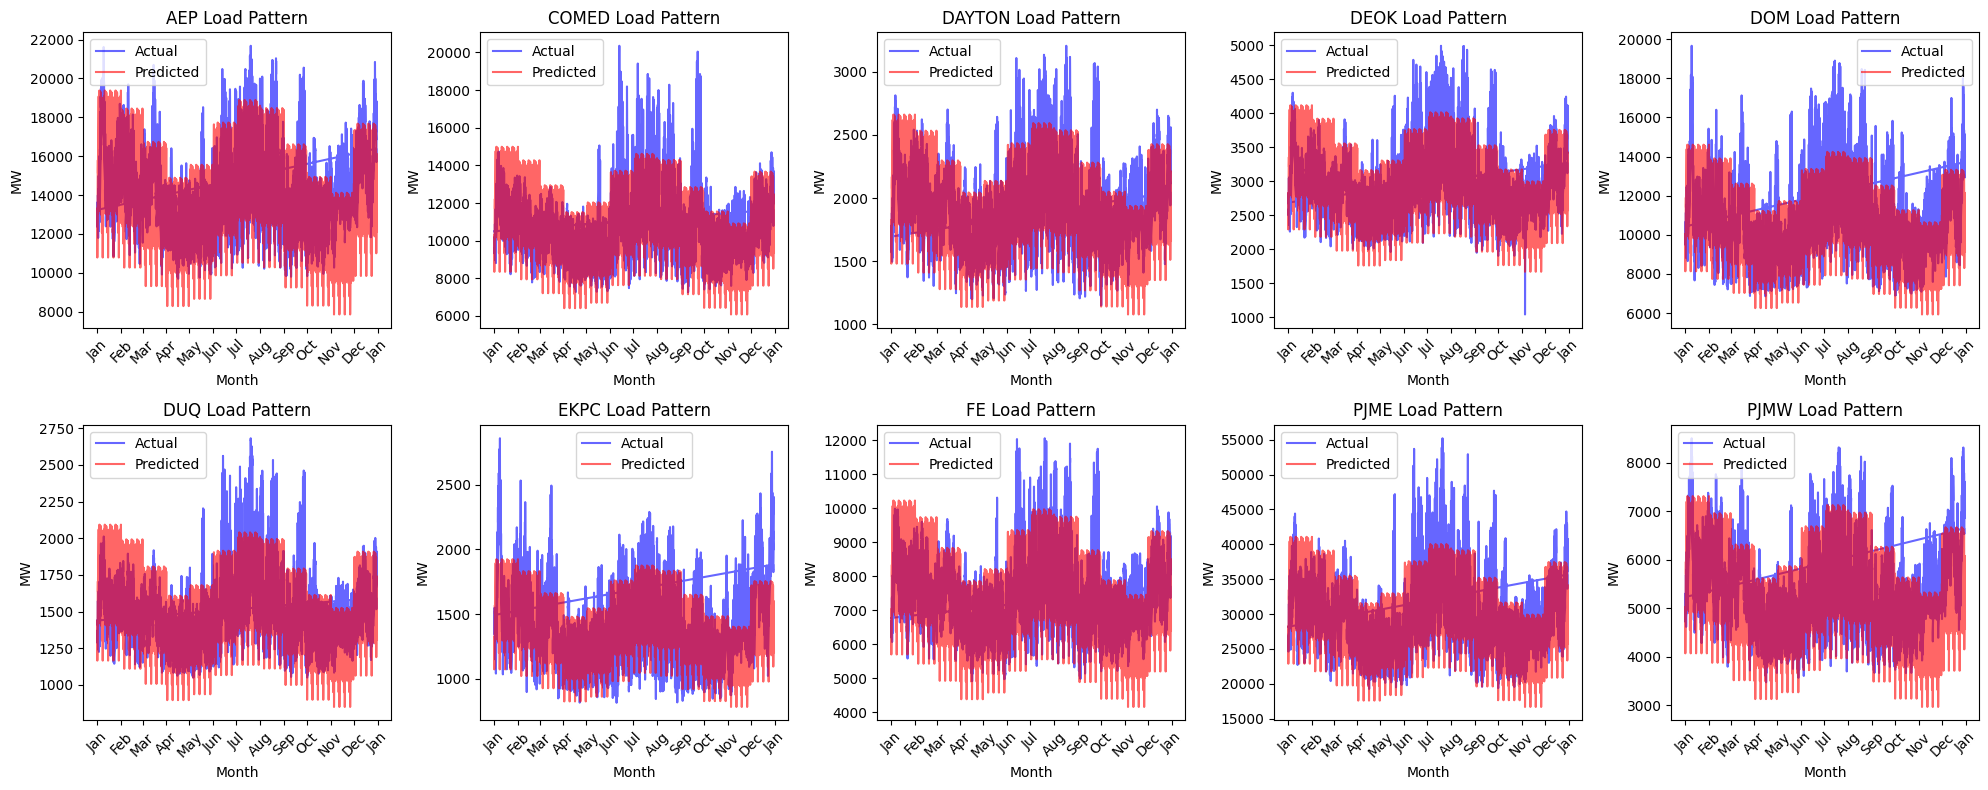

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

def validate(hourly_multipliers, daily_multipliers, monthly_multipliers, yearly_growth_rate,
          test_start='2017-01-01', test_end='2017-12-31', base_year=2016):
    
    utility_files = {
        'AEP': 'AEP_hourly.csv',
        'COMED': 'COMED_hourly.csv',
        'DAYTON': 'DAYTON_hourly.csv',
        'DEOK': 'DEOK_hourly.csv',
        'DOM': 'DOM_hourly.csv',
        'DUQ': 'DUQ_hourly.csv',
        'EKPC': 'EKPC_hourly.csv',
        'FE': 'FE_hourly.csv',
        'PJME': 'PJME_hourly.csv',
        'PJMW': 'PJMW_hourly.csv'
    }
    
    # Create subplot grid
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    
    for idx, (utility_name, filename) in enumerate(utility_files.items()):
        try:
            # Read utility data
            df = pd.read_csv(filename)
            df['Datetime'] = pd.to_datetime(df['Datetime'])
            
            # Use correct column name for this utility
            mw_column = f"{utility_name}_MW"
            
            # Calculate base consumption (average MW for base_year)
            base_data = df[df['Datetime'].dt.year == base_year]
            base_consumption = base_data[mw_column].mean()
            
            # Get test period data
            test_mask = (df['Datetime'] >= test_start) & (df['Datetime'] <= test_end)
            test_data = df[test_mask].copy()
            
            # Plot actual data
            axes[idx].plot(test_data['Datetime'], test_data[mw_column], 'b-', label='Actual', alpha=0.6)
            
            # Make predictions using the patterns
            predictions = pd.date_range(start=test_start, end=test_end, freq='H')
            pred_df = pd.DataFrame(index=predictions)
            pred_df['hour'] = pred_df.index.hour
            pred_df['day_of_week'] = pred_df.index.dayofweek
            pred_df['month'] = pred_df.index.month
            pred_df['year'] = pred_df.index.year
            
            # Apply multipliers
            pred_values = base_consumption
            pred_values *= pred_df['hour'].map(hourly_multipliers)
            pred_values *= pred_df['day_of_week'].map(daily_multipliers)
            pred_values *= pred_df['month'].map(monthly_multipliers)
            
            # Apply yearly growth
            years_diff = pred_df['year'] - base_year
            pred_values *= (1 + yearly_growth_rate) ** years_diff
            
            # Plot predicted data
            axes[idx].plot(predictions, pred_values, 'r-', label='Predicted', alpha=0.6)
            
            # Format plot
            axes[idx].set_title(f'{utility_name} Load Pattern')
            axes[idx].set_xlabel('Month')
            axes[idx].set_ylabel('MW')
            axes[idx].legend()
            
            # Format x-axis
            axes[idx].xaxis.set_major_locator(MonthLocator())
            axes[idx].xaxis.set_major_formatter(DateFormatter('%b'))
            plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)
            
        except Exception as e:
            print(f"Error processing {utility_name}: {str(e)}")
    
    plt.tight_layout()
    plt.show()

# Extract patterns from combined dataset
dataset = pd.read_csv('combined_utility_data_with_MW_pattern.csv')
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])

# Extract patterns
def extract_hourly_pattern(df):
    df['hour'] = df['Datetime'].dt.hour
    hourly_averages = df.groupby('hour')['MW_pattern'].mean()
    return hourly_averages.to_dict()

def extract_daily_pattern(df):
    df['day_of_week'] = df['Datetime'].dt.dayofweek
    daily_averages = df.groupby('day_of_week')['MW_pattern'].mean()
    return daily_averages.to_dict()

def extract_monthly_pattern(df):
    df['month'] = df['Datetime'].dt.month
    monthly_averages = df.groupby('month')['MW_pattern'].mean()
    return monthly_averages.to_dict()

def extract_yearly_growth(df):
    df['year'] = df['Datetime'].dt.year
    yearly_averages = df.groupby('year')['MW_pattern'].mean()
    yoy_growth_rates = yearly_averages.pct_change()
    growth_rates_plus_one = yoy_growth_rates + 1
    avg_growth_rate = np.power(np.prod(growth_rates_plus_one.dropna()), 
                            1/len(growth_rates_plus_one.dropna())) - 1
    return avg_growth_rate

hourly_multipliers = extract_hourly_pattern(dataset)
daily_multipliers = extract_daily_pattern(dataset)
monthly_multipliers = extract_monthly_pattern(dataset)
yearly_growth_rate = extract_yearly_growth(dataset)

# Run validation with plots
validate(hourly_multipliers, daily_multipliers, monthly_multipliers, yearly_growth_rate)
